In [ ]:
import sys
sys.path.append("../../..")

import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

from src.config.path import SEGMENTATION_YOLO_PATH
from src.capture.capture import CameraFrameCapture

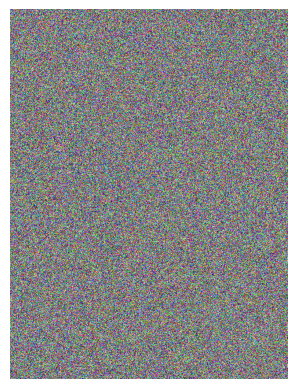

In [13]:
background = np.random.randint(0, 255, (480, 640, 3))

plt.imshow(background.transpose((1, 0, 2)))
plt.axis('off')
plt.show()


0: 480x640 2 persons, 42.2ms
Speed: 6.9ms preprocess, 42.2ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


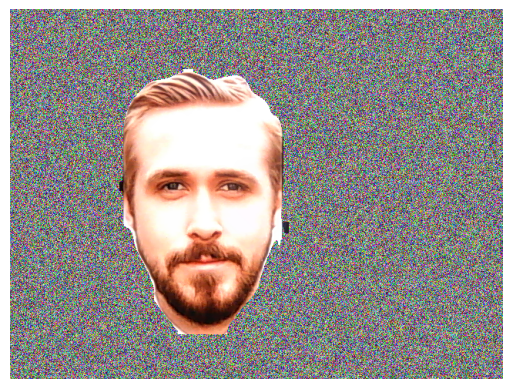

In [ ]:
model = YOLO(SEGMENTATION_YOLO_PATH)

with CameraFrameCapture() as cap:
    frame = cap.read()
    results = model.predict(frame, classes=[0])

    for result in results:
        for mask in result.masks.xy:
            points = np.array([mask], dtype=np.int32)

            image_mask = np.zeros(frame.shape[:2], dtype=np.uint8)
            cv2.fillPoly(image_mask, points, 255)

            frame = np.where(image_mask[..., np.newaxis] == 255, frame, background)

    plt.imshow(frame)
    plt.axis('off')
    plt.show()